# LAB06 Assigment

# 12012727 王铎磊


### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np


class LDA:
    #n_components: Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X:np.ndarray, y:np.ndarray):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n = np.shape(X)[1]
        labels = np.unique(y)
        Cs = []
        
        for lb in labels:
            Cs.append(np.argwhere(y == lb).reshape(-1).tolist()) 
            
        cls_indices = np.array(Cs)
        
        # k 类
        k = len(Cs)
        u_ks = []
        for i in range(k):
            u_ks.append(np.mean(X[cls_indices[i]], axis=0))
        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        S_W = np.zeros((n, n)) 
        for i in range(len(Cs)):
            S_k = np.zeros((n, n))
            for xi in X[cls_indices[i]]:
                vec: np.array = xi - u_ks[i]
                if(vec.ndim == 1):
                    vec = np.reshape(vec, (vec.shape[0], 1))
                
                S_k += vec @ vec.T
                                            
            S_W += S_k
        # Between class scatter matrix
        # Complete code for calculating S_B
        ########### Write Your Code Here ###########
        u = np.mean(u_ks, axis=0)
        S_B = np.zeros((n, n))
        for i in range(len(Cs)):
            vec = u_ks[i] - u
            if(vec.ndim == 1):
                vec = np.expand_dims(vec, axis=0)
            S_B += len(cls_indices[i])*(vec.T*vec)

      
        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########
        A = np.linalg.inv(S_W) @ S_B 
        
        
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########
        eigenvalues, eigenvectors = np.linalg.eig(A)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X):
        ########### Write Your Code Here ###########
        
        return None  
  
    def transform(self, X):
        ########### Write Your Code Here ###########
        return X@self.eigenvectors  

            
            

- <font size=4> Dimensionality reduction visualization<font>

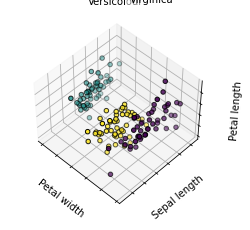

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [1]:
########### Write Your Code Here ###########
from keras.datasets import mnist
############################################

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

###  Visualization of MINIST

In [ ]:
# Visualize MINIST
########### Write Your Code Here ###########
from PIL import Image
(X_train, y_train), (X_test, y_test) = mnist.load_data()


container = Image.new("L", (280, 280))

imgs = []

for i in range(100):
    data = X_train[i]
    pic = data.reshape(28, 28)
    pil_pic = Image.fromarray(np.uint8(pic))
    imgs.append(pil_pic)

to_paste = np.reshape(imgs, (10, 10))
for i in range(10):
    for j in range(10):
        container.paste(to_paste[i, j], (28*i, 28*j))

container
############################################

### Fit  Model

In [ ]:
########### Write Your Code Here ###########
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train = np.reshape(X_train, (X_train.shape[0], 28*28))
X_test = np.reshape(X_test, (X_test.shape[0], 28*28))

lda = LinearDiscriminantAnalysis(shrinkage=0.48, solver="lsqr")

lda.fit(X_train, y_train)
############################################

## Evaluate model

In [ ]:
########### Write Your Code Here ###########
from sklearn.metrics import accuracy_score, f1_score, r2_score
from sklearn.model_selection import cross_val_score

def printScores(model):
    print("Accuracy in train set:", accuracy_score(y_train, model.predict(X_train)))
    print("Accuracy in test set:", accuracy_score(y_test, model.predict(X_test)))
    print("Cross-Validation-Score:", np.average(cross_val_score(model, X, y, cv = 5)))
############################################

In [ ]:
printScores(lda)

### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?


优点：

- 在降维过程中可以使用类别的先验知识经验，而像PCA这样的无监督学习则无法使用类别先验知识。
- LDA在样本分类信息依赖均值而不是方差的时候，比PCA之类的算法较优。

缺点：
- LDA不适合对非高斯分布样本进行降维。
- LDA降维最多降到类别数 k - 1 的维数，如果我们降维的维度大于 k - 1，则不能使用LDA。
- 有一些LDA的进化版算法可以绕过这个问题。
- LDA在样本分类信息依赖方差而不是均值的时候，降维效果不好。
- LDA可能过度拟合数据。

- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?

PCA是为了让映射后的样本具有最大的发散性；而LDA是为了让映射后的样本有最好的分类性能。所以说PCA是一种无监督的降维方法，而LDA是一种有监督的降维方法。